# BUSINESS UNDERSTANDING
- Purpose (Why was the dataset collected in the first place) 
- Describe how you would define and measure the outcomes of the dataset 
- Why is this data important? 
- How do you know if you have mined useful knowledge from the dataset? 
- How would you measure the effectiveness of a good prediction algorithm? (BE SPECIFIC) 


# DATA MEANING TYPE (DATA DICTIONARY)
- Describe the meaning and type of data for each attribute 
    - Scale (linear, log, low <--> high, etc) 
    - Values 




# DATA QUALITY
- Explain any missing values 
- Duplicate data 
- Outliers 
- Are those mistakes? 
- Method of dealing with issues? 
- Justification for method 



## Functions, Libraries & Variables

In [1]:
########################
## Libraries
########################
import os
import pandas as pd
import gc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
gc.collect()

########################
## Variables
########################
PCT_MISSING = .30                       ## Define % missing
LENDING_PATH = os.path.join("data")     ## Location of data files
LENDING_FILE = "loan.csv"               ## Source data file name
BACKUP_FILE = "backup.csv"              ## Backup data file name

########################
### Functions
### Load Data Set
########################
def load_lending_data(lending_path = LENDING_PATH, lending_file = LENDING_FILE):
    csv_path = os.path.join(lending_path, lending_file)
    return pd.read_csv(csv_path, low_memory=False)

### Load latest backup data set
def load_backup_data(lending_path = LENDING_PATH, backup_file = BACKUP_FILE):
    csv_path = os.path.join(lending_path, backup_file)
    return pd.read_csv(csv_path, low_memory=False)

## Backup current data set
def writeLendingData(lending_path = LENDING_PATH, backup_file = BACKUP_FILE):
    csv_path = os.path.join(lending_path, backup_file)
    lending.to_csv(csv_path, index=None, header=True)

## Drop columns
def drop_irrelevant_columns(columnList):
    dfShape = lending.shape
    lending.drop(columnList, axis=1, inplace=True)  
    print("\nBefore: rows,columns",dfShape,"\nAfter: rows,columns",lending.shape)
    gc.collect()
    
## Let's drop any columns w/more than %30 of the data misssing for now
def remove_NaNs(pctMissing = PCT_MISSING): 
    dfShape = lending.shape
    cols = (lending.isnull().sum()/len(lending))
    cols = list(cols[cols.values>=pctMissing].index)
    lending.drop(labels = cols,axis =1,inplace=True)        
    print("Number of Columns dropped\t: ",len(cols))
    print("\nBefore: rows,columns",dfShape,"\nAfter: rows,columns",lending.shape)

### Let's determine the number of missing values where it's greater than PCT_MISSING
def showMissingValues(pctMissing = PCT_MISSING):
    dfShape = lending.shape
    selectedColumns = lending.isnull().sum()
    return selectedColumns[selectedColumns.values > (pctMissing*len(lending))]
    print("\nBefore: rows,columns",dfShape,"\nAfter: rows,columns",lending.shape)

## Plot missing values based on current PCT_MISSING
def plotMissingValues():
    ## Determine missing values and plot
    missingValues = showMissingValues()
    plt.figure(figsize=(20,4))
    missingValues.plot(kind='bar')
    title = 'Columns where NA > ' + str(PCT_MISSING*100) + '%'
    plt.title(title)
    plt.show

# Drop the rows even with single NaN or single missing values.    
def dropNanRows():
    dfShape = lending.shape
    lending.dropna()
    print("\nBefore: rows,columns",dfShape,"\nAfter: rows,columns",lending.shape)

## Drop Column List

In [2]:
## Remove data not available prior to loan being established.
miscColumns = ['id', 'member_id', 'emp_title', 'desc', 'zip_code', 'title', 
               'url', 'policy_code'
              ]

hardshipColumns = ['hardship_flag', 'hardship_type', 'hardship_reason', 
                   'hardship_status', 'deferral_term', 'hardship_amount', 
                   'hardship_start_date', 'hardship_end_date', 
                   'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 
                   'hardship_loan_status', 'orig_projected_additional_accrued_interest', 
                   'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
                   'pymnt_plan'
                  ]

settlementColumns = ['debt_settlement_flag', 'debt_settlement_flag_date',
                     'settlement_status','settlement_date','settlement_amount', 
                     'settlement_percentage', 'settlement_term'
                    ]

fundsReceviedColumns = ['total_pymnt', 'total_pymnt_inv', 'total_rec_int', 
                        'total_rec_late_fee', 'total_rec_prncp'
                       ]

postLoanInformation = ['out_prncp', 'out_prncp_inv']

loanPaymentColumns = ['last_pymnt_amnt', 'last_pymnt_d','next_pymnt_d',
                      'recoveries'
                     ]

## Load Data & Drop Columns

In [3]:
## Load the data set
lending = load_lending_data()

In [4]:
## Drop irrelevant columns that we are know of
drop_irrelevant_columns(miscColumns)
drop_irrelevant_columns(hardshipColumns)
drop_irrelevant_columns(settlementColumns)
drop_irrelevant_columns(fundsReceviedColumns)
drop_irrelevant_columns(loanPaymentColumns)
drop_irrelevant_columns(postLoanInformation)



Before: rows,columns (2260668, 145) 
After: rows,columns (2260668, 137)

Before: rows,columns (2260668, 137) 
After: rows,columns (2260668, 121)

Before: rows,columns (2260668, 121) 
After: rows,columns (2260668, 114)

Before: rows,columns (2260668, 114) 
After: rows,columns (2260668, 109)

Before: rows,columns (2260668, 109) 
After: rows,columns (2260668, 105)

Before: rows,columns (2260668, 105) 
After: rows,columns (2260668, 103)


## PCT Missing Value Analysis

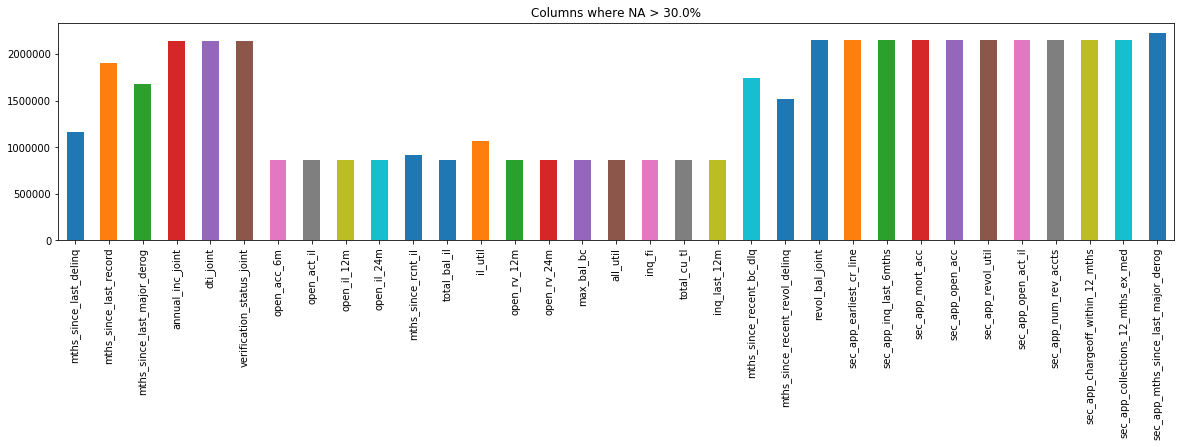

In [5]:
## PCT Missing Analysis
plotMissingValues()

The attributes above have greater than 30% values missing.  Most of these attributes are related to a secondary applicant which makes sense as not all applicants will have a joint or secondary applicant.  Let's determine if we should remove the secondary applicant data.

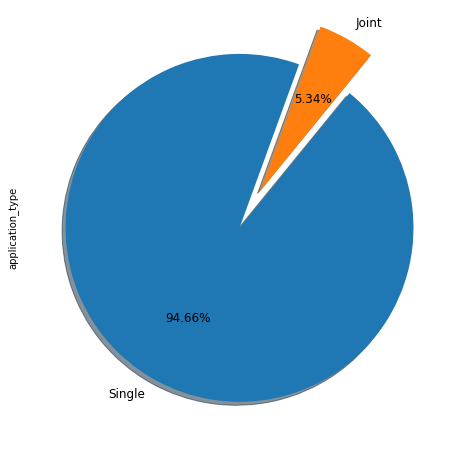

In [6]:
lending["application_type"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', 
                                                    shadow=True, labels=("Single","Joint"),
                                                   fontsize=12, startangle=70,figsize=(16,8))



- Secondary applicants makes up less than 5.5% of the data but account for a large number of missing values.  Let's remove the joint applicant data and focus on the primary borrower.

In [7]:
## Create function to drop secondary applicant attributes
def dropJointApplicant():
    jointApplicantColumns = [
                             'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 
                             'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 
                             'sec_app_open_act_il', 'sec_app_num_rev_accts', 
                             'sec_app_chargeoff_within_12_mths', 
                             'sec_app_collections_12_mths_ex_med', 
                             'sec_app_mths_since_last_major_derog',
                             'annual_inc_joint', 'dti_joint', 'revol_bal_joint',
                             'verification_status_joint'
                        ]
    drop_irrelevant_columns(jointApplicantColumns)

## Drop secondary applicant attributes
dropJointApplicant()


Before: rows,columns (2260668, 103) 
After: rows,columns (2260668, 89)


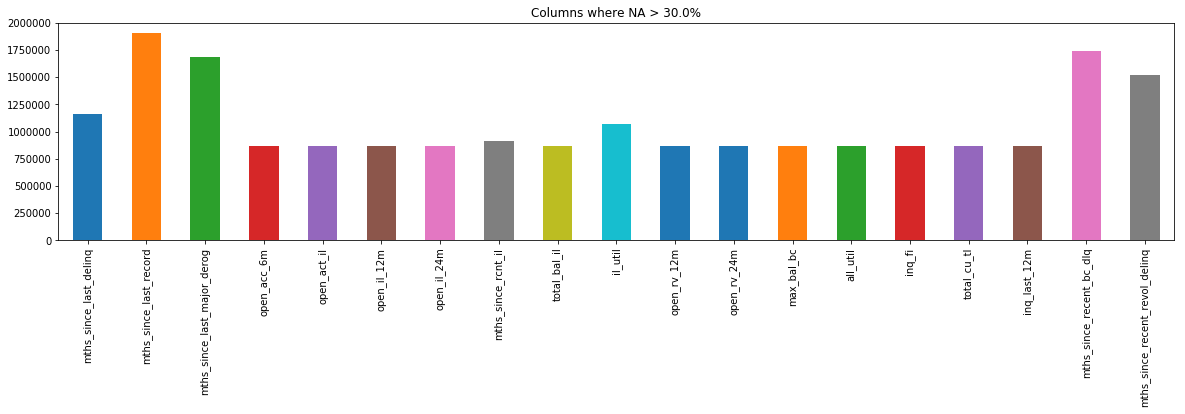

In [8]:
plotMissingValues()

- Let's assume attributes related the number of months since a last event is missing due to the fact that the particular event never occured.  We'll set these values to a large enough value so that lack of an occurence is captured.  We are assuming that smaller values indicate a borrower has a higher risk of defaulting on their loan.

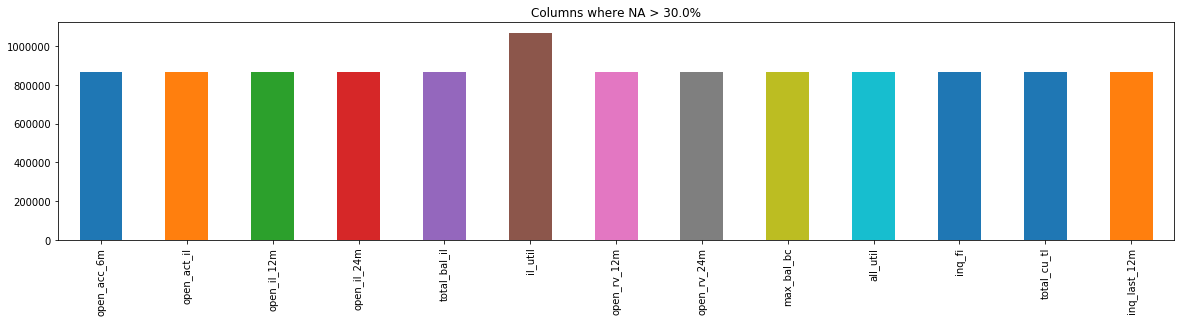

In [9]:
# The number of months since the borrower's last delinquency.
lending['mths_since_last_delinq'].fillna(999, inplace=True)

# Months since most recent 90-day or worse rating
lending['mths_since_last_major_derog'].fillna(999, inplace=True)

# The number of months since the last public record.
lending['mths_since_last_record'].fillna(999, inplace=True)

# Months since most recent installment accounts opened
lending['mths_since_rcnt_il'].fillna(999, inplace=True)

# Months since most recent bankcard account opened.
lending['mths_since_recent_bc'].fillna(999, inplace=True)

# Months since most recent bankcard delinquency
lending['mths_since_recent_bc_dlq'].fillna(999, inplace=True)

# Months since most recent inquiry.
lending['mths_since_recent_inq'].fillna(999, inplace=True)

# Months since most recent revolving delinquency.
lending['mths_since_recent_revol_delinq'].fillna(999, inplace=True)
plotMissingValues()


- Some of the values represent the number of times an event occured.  If the value is NaN, we'll consider the never occured and will set the count to 0.  Opening too many recent accounts could result in the potential borrower being flagged as a risk for default.

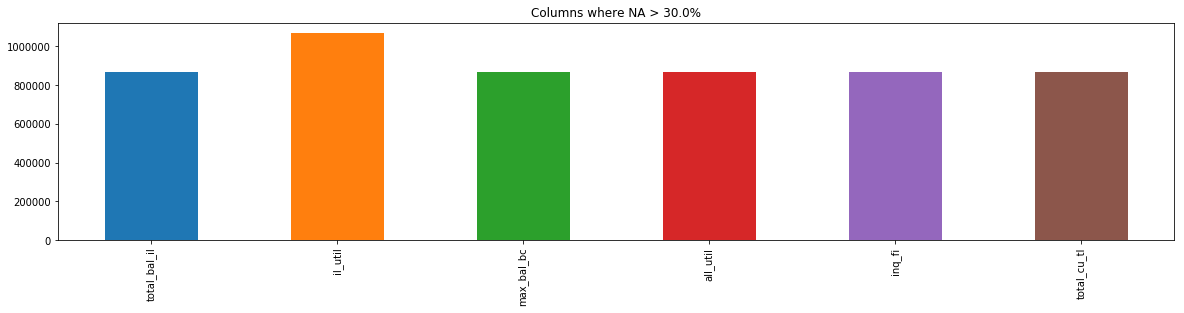

In [10]:
# The number of open credit lines in the borrower's credit file.
lending['open_acc'].fillna(0, inplace=True) 

# Number of open trades in last 6 months
lending['open_acc_6m'].fillna(0, inplace=True)

# Number of installment accounts opened in past 12 months
lending['open_il_12m'].fillna(0, inplace=True)

# Number of installment accounts opened in past 24 months
lending['open_il_24m'].fillna(0, inplace=True)

# Number of currently active installment trades
lending['open_act_il'].fillna(0, inplace=True)

# Number of revolving trades opened in past 12 months
lending['open_rv_12m'].fillna(0, inplace=True)

# Number of revolving trades opened in past 24 months
lending['open_rv_24m'].fillna(0, inplace=True)

# Number of credit inquiries in past 12 months
lending['inq_last_12m'].fillna(0, inplace=True)
plotMissingValues()

Let's remove rows where NaNs as these attributes may be important

- total_bal_il - Total current balance of all installment accounts
- il_tuil - Ratio of total current balance to high credit/credit limit on all install acct
- max_bal_bc - Maximum current balance owed on all revolving accounts
- all_util - Balance to credit limit on all trades
- inq_fi - Number of personal finance inquiries
- total_cu_tl - Number of finance trades


In [11]:
## Drop the rows even with single NaN or single missing values.
dfShape = lending.shape
lending = lending.dropna()
print("\nBefore: rows,columns",dfShape,"\nAfter: rows,columns",lending.shape)

## Check point save data to CSV.  
#writeLendingData()



Before: rows,columns (2260668, 89) 
After: rows,columns (1050374, 89)


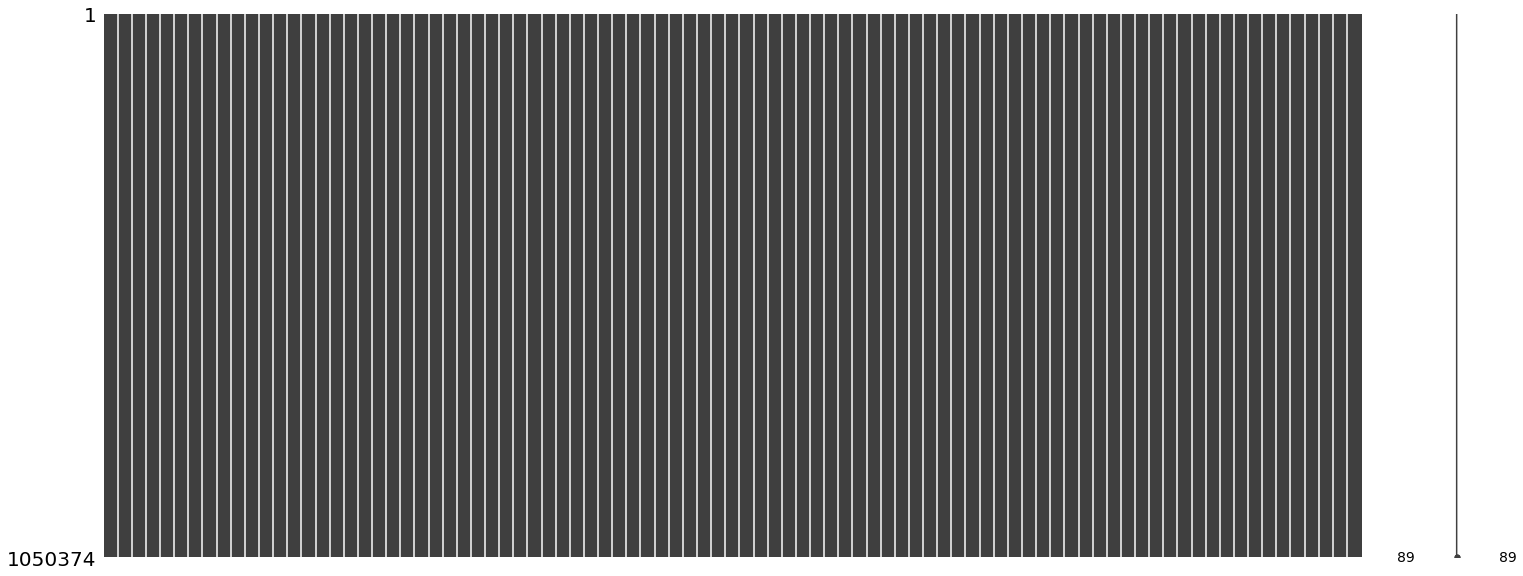

In [12]:
import missingno as msno
msno.matrix(lending)

## Good / Bad Risk

Lending Club's generate revenue by collecting interest payements on loans to its consumers.  The goal with any loan is to have it fully paid back overtime.  Loans that go in default reduces forecasted revenues which impacts investors that are matched with the borrower.  The loan_status column was utilized to determine what percentage of loans were bad.  With the data given, can we come up with an algorithm to better predict borrowers who will either default on would have a higher probability of defaulting on their loans.

First, let's determine from the loan_status columns which loans should be considered bad risk or good risk.  


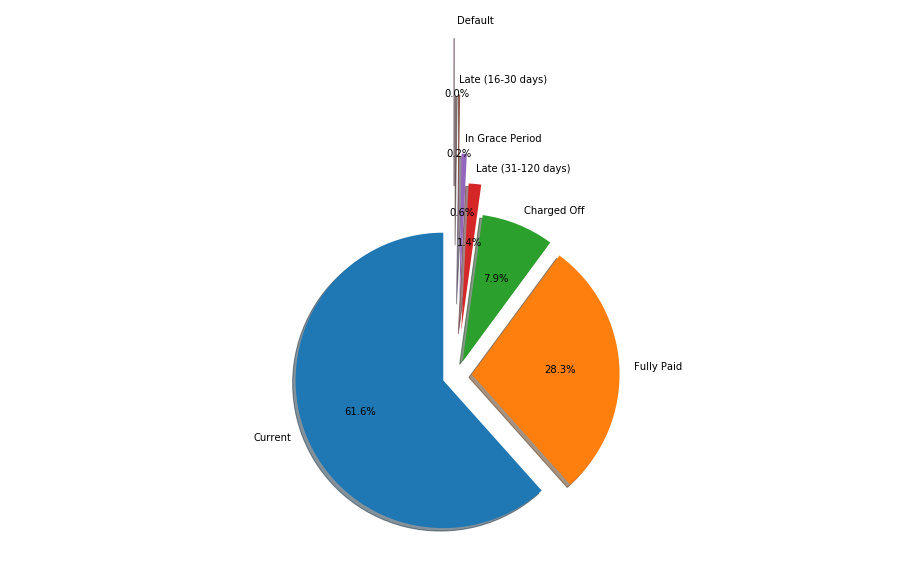

In [13]:
extract = lending["loan_status"].value_counts()
explodeTuple = (0.1, 0.1, 0.1, 0.3, 0.5, 0.9, 1.3)

fig, ax = plt.subplots(figsize=(16, 10), subplot_kw=dict(aspect="equal"))

ax.pie(extract.values, explode=explodeTuple, labels=extract.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


- We'll define a loan as being a good risk or bad risk based on one of the following: Charged Off, Late, In Grace Period of Default

In [14]:
## Define a good or bad risk
goodLoan = ['Current', 'Fully Paid']

# Use risk definition to define new column
def determineLoanRisk (loan_status_):
    if loan_status_ in goodLoan:
        return 'good'
    else:
        return 'bad'

# Create new column risk which tracks whether this was a good or bad risk.
lending['risk'] = lending['loan_status'].apply(determineLoanRisk)

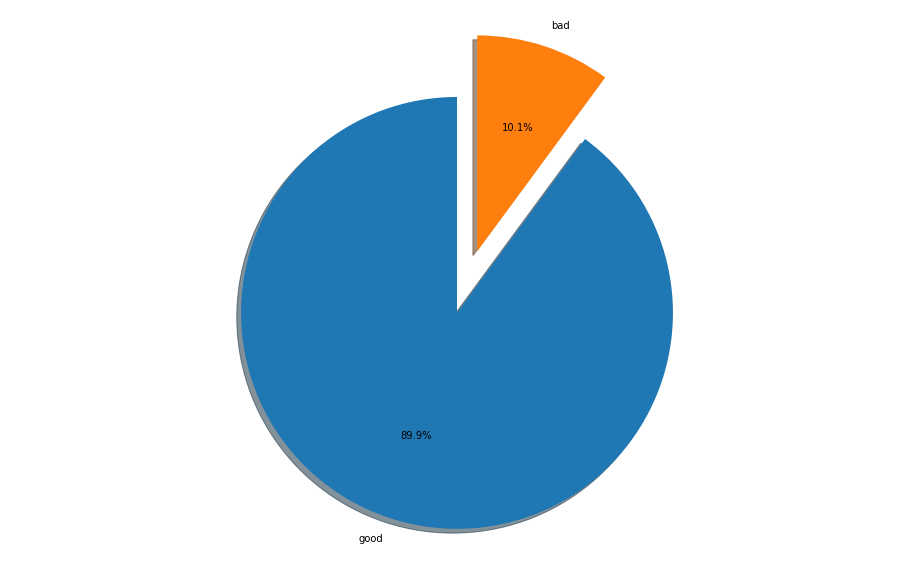

In [15]:
## Plot the ratio of good risk to bad risk
extract = lending["risk"].value_counts()
explodeTuple = (0.0, 0.3)

fig, ax = plt.subplots(figsize=(16, 10), subplot_kw=dict(aspect="equal"))

ax.pie(extract.values, explode=explodeTuple, labels=extract.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

- We can now proceed to evaluate the data set to find trend in the data taking risk in consideration. 

In [16]:
############################################################
## Save Current DataSet before running EDA
##
## Saving the current dataset gives us the opportunity
## to jump right into the EDA or model building without
## running all of the data prep code.'''
############################################################
BACKUP_FILE = "preEDA.csv"
writeLendingData()

# Simple Statistics
- Visualize appropriate statistics for a subset of attributes 
    - Range 
    - Mode 
    - Mean 
    - Median 
    - Variance 
    - Counts 
- Describe anything meaningful you found from this or if you found something potentially interesting.  (Note: You can also use data from other sources for comparison.) 
- Explain why the statistics run are meaningful 


## Pandas Profiling Report

In [ ]:
## Run to load cleansed data
## BACKUP_FILE = "backup.csv"
## lending = load_backup_data()

In [ ]:
import pandas_profiling as pp
pp.ProfileReport(lending)

# VISUALIZE ATTRIBUTES - James and Alex
- Visualize the most interesting attributes 
    - Minimum of 5 
    - Why are they interesting in your opinion 
- Explain for each attribute why the chosen visualization is appropriate. 


In [ ]:
!ls

# EXPLORE JOINT ATTRIBUTES - James
- Visualize relationships between attributes 
    - Scatter plots 
    - Correlation 
    - Cross-tabulation 
    - Group-wise averages 
- Explain any interesting relationships 

# EXPLORE ATTRIBUTES AND CLASS - James & Limin
- Identify and explain interesting relationships between features and the class you are trying to predict 
    - Relationships with variables and the target classification 


# NEW FEATURES - Alex
- Are there other features that could be added to the data or created from existing features? 
    - Which ones and why? 


# EXCEPTIONAL WORK - Limin
- Add any additional analyses 
- EXAMPLE:  Implement dimensionality reduction, then visualize and interpret the results 


# Appendix

## Column Descriptions

| BrowseNotesFile | Description |
| --------------- | ----------- |
|acceptD | The date which the borrower accepted  the offer |
| accNowDelinq | The number of accounts on which the borrower is now delinquent. |
| accOpenPast24Mths | Number of trades opened in past 24 months. |
| addrState | The state provided by the borrower in the loan application |
| all_util | Balance to credit limit on all trades |
| annual_inc_joint | The combined self-reported annual income provided by the co-borrowers during registration |
| annualInc | The self-reported annual income provided by the borrower during registration. |
| application_type | Indicates whether the loan is an individual application or a joint application with two co-borrowers |
| avg_cur_bal | Average current balance of all accounts |
| bcOpenToBuy | Total open to buy on revolving bankcards. |
| bcUtil | Ratio of total current balance to high credit/credit limit for all bankcard accounts. |
| chargeoff_within_12_mths | Number of charge-offs within 12 months |
| collections_12_mths_ex_med | Number of collections in 12 months excluding medical collections |
| creditPullD | The date LC pulled credit for this loan |
| delinq2Yrs | The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years |
| delinqAmnt | The past-due amount owed for the accounts on which the borrower is now delinquent. |
| desc | Loan description provided by the borrower |
| dti | A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income. |
| dti_joint | A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income |
| earliestCrLine | The date the borrower's earliest reported credit line was opened |
| effective_int_rate | The effective interest rate is equal to the interest rate on a Note reduced by Lending Club's estimate of the impact of uncollected interest prior to charge off. |
| emp_title | The job title supplied by the Borrower when applying for the loan.* |
| empLength | Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. |
| expD | The date the listing will expire |
| expDefaultRate | The expected default rate of the loan. |
| ficoRangeHigh | The upper boundary range the borrower’s FICO at loan origination belongs to. |
| ficoRangeLow | The lower boundary range the borrower’s FICO at loan origination belongs to. |
| fundedAmnt | The total amount committed to that loan at that point in time. |
| grade | LC assigned loan grade |
| homeOwnership | The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER. |
| id | A unique LC assigned ID for the loan listing. |
| il_util | Ratio of total current balance to high credit/credit limit on all install acct |
| ils_exp_d | wholeloan platform expiration date |
| initialListStatus | The initial listing status of the loan. Possible values are – W, F |
| inq_fi | Number of personal finance inquiries |
| inq_last_12m | Number of credit inquiries in past 12 months |
| inqLast6Mths | The number of inquiries in past 6 months (excluding auto and mortgage inquiries) |
| installment | The monthly payment owed by the borrower if the loan originates. |
| intRate | Interest Rate on the loan |
| isIncV | Indicates if income was verified by LC, not verified, or if the income source was verified |
| listD | The date which the borrower's application was listed on the platform. |
| loanAmnt | The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value. |
| max_bal_bc | Maximum current balance owed on all revolving accounts |
| memberId | A unique LC assigned Id for the borrower member. |
| mo_sin_old_rev_tl_op | Months since oldest revolving account opened |
| mo_sin_rcnt_rev_tl_op | Months since most recent revolving account opened |
| mo_sin_rcnt_tl | Months since most recent account opened |
| mortAcc | Number of mortgage accounts. |
| msa | Metropolitan Statistical Area of the borrower. |
| mths_since_last_major_derog | Months since most recent 90-day or worse rating |
| mths_since_oldest_il_open | Months since oldest bank installment account opened |
| mths_since_rcnt_il | Months since most recent installment accounts opened |
| mthsSinceLastDelinq | The number of months since the borrower's last delinquency. |
| mthsSinceLastRecord | The number of months since the last public record. |
| mthsSinceMostRecentInq | Months since most recent inquiry. |
| mthsSinceRecentBc | Months since most recent bankcard account opened. |
| mthsSinceRecentLoanDelinq | Months since most recent personal finance delinquency. |
| mthsSinceRecentRevolDelinq | Months since most recent revolving delinquency. |
| num_accts_ever_120_pd | Number of accounts ever 120 or more days past due |
| num_actv_bc_tl | Number of currently active bankcard accounts |
| num_actv_rev_tl | Number of currently active revolving trades |
| num_bc_sats | Number of satisfactory bankcard accounts |
| num_bc_tl | Number of bankcard accounts |
| num_il_tl | Number of installment accounts |
| num_op_rev_tl | Number of open revolving accounts |
| num_rev_accts | Number of revolving accounts |
| num_rev_tl_bal_gt_0 | Number of revolving trades with balance >0 |
| num_sats | Number of satisfactory accounts |
| num_tl_120dpd_2m | Number of accounts currently 120 days past due (updated in past 2 months) |
| num_tl_30dpd | Number of accounts currently 30 days past due (updated in past 2 months) |
| num_tl_90g_dpd_24m | Number of accounts 90 or more days past due in last 24 months |
| num_tl_op_past_12m | Number of accounts opened in past 12 months |
| open_acc_6m | Number of open trades in last 6 months |
| open_il_12m | Number of installment accounts opened in past 12 months |
| open_il_24m | Number of installment accounts opened in past 24 months |
| open_act_il | Number of currently active installment trades |
| open_rv_12m | Number of revolving trades opened in past 12 months |
| open_rv_24m | Number of revolving trades opened in past 24 months |
| openAcc | The number of open credit lines in the borrower's credit file. |
| pct_tl_nvr_dlq | Percent of trades never delinquent |
| percentBcGt75 | Percentage of all bankcard accounts > 75% of limit. |
| pub_rec_bankruptcies | Number of public record bankruptcies |
| pubRec | Number of derogatory public records |
| purpose | A category provided by the borrower for the loan request. |
| reviewStatus | The status of the loan during the listing period. Values: APPROVED, NOT_APPROVED. |
| reviewStatusD | The date the loan application was reviewed by LC |
| revolBal | Total credit revolving balance |
| revolUtil | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit. |
| serviceFeeRate | Service fee rate paid by the investor for this loan. |
| subGrade | LC assigned loan subgrade |
| tax_liens | Number of tax liens |
| term | The number of payments on the loan. Values are in months and can be either 36 or 60. |
| title | The loan title provided by the borrower |
| tot_coll_amt | Total collection amounts ever owed |
| tot_cur_bal | Total current balance of all accounts |
| tot_hi_cred_lim | Total high credit/credit limit |
| total_bal_il | Total current balance of all installment accounts |
| total_cu_tl | Number of finance trades |
| total_il_high_credit_limit | Total installment high credit/credit limit |
| total_rev_hi_lim | Total revolving high credit/credit limit |
| totalAcc | The total number of credit lines currently in the borrower's credit file |
| totalBalExMort | Total credit balance excluding mortgage |
| totalBcLimit | Total bankcard high credit/credit limit |
| url | URL for the LC page with listing data. |
| verified_status_joint | Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified |
| zip_code | The first 3 numbers of the zip code provided by the borrower in the loan application. |
| revol_bal_joint | Sum of revolving credit balance of the co-borrowers, net of duplicate balances |
| sec_app_fico_range_low | FICO range (high) for the secondary applicant |
| sec_app_fico_range_high | FICO range (low) for the secondary applicant |
| sec_app_earliest_cr_line | Earliest credit line at time of application for the secondary applicant |
| sec_app_inq_last_6mths | Credit inquiries in the last 6 months at time of application for the secondary applicant |
| sec_app_mort_acc | Number of mortgage accounts at time of application for the secondary applicant |
| sec_app_open_acc | Number of open trades at time of application for the secondary applicant |
| sec_app_revol_util | Ratio of total current balance to high credit/credit limit for all revolving accounts |
| sec_app_open_act_il | Number of currently active installment trades at time of application for the secondary applicant |
| sec_app_num_rev_accts | Number of revolving accounts at time of application for the secondary applicant |
| sec_app_chargeoff_within_12_mths | Number of charge-offs within last 12 months at time of application for the secondary applicant |
| sec_app_collections_12_mths_ex_med | Number of collections within last 12 months excluding medical collections at time of application for the secondary applicant |
| sec_app_mths_since_last_major_derog | Months since most recent 90-day or worse rating at time of application for the secondary applicant |
| disbursement_method | The method by which the borrower receives their loan. Possible values are: CASH, DIRECT_PAY |



In [ ]:
lending.info(1)